In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi =  "indata/3pipesL"         #location of .inp file
fc = "indata/3pipesL"          #location of .config file
mtype = 1                      #model used along network edges. 1 for Preissman Slot. 0 for uniform
V0 =[]
Vf = []
Hbar = []
legs = []
lr = []

In [3]:
for i in range(0,3):
    fii = fi+"%d.inp"%i
    fci = fc+"%d.config"%i
    print fci
    n0 = PyNetwork(fii, fci, mtype)     #a network object
    T = n0.T
    M = n0.M
    dt = T/M
    print "T = %.2f M = %d , L = [%.f, %.f, %.f]"%(T,M, n0.Ls[0], n0.Ls[1], n0.Ls[2])
    V0.append(n0.getTotalVolume())
    n0.runForwardProblem(dt)
    Vf.append(n0.getTotalVolume())
    htmp = [n0.getAveGradH(i) for i in range(n0.M+1)]
    Hbar.append(htmp)
    #Hmax.append(max([n0.q]))
    lr.append(n0.Ls[2]/n0.Ls[1])
    legs.append("L1/L2 = %1.2f"%(n0.Ls[2]/n0.Ls[1]))


indata/3pipesL0.config
T = 18.00 M = 4200 , L = [100, 100, 25]
indata/3pipesL1.config
T = 18.00 M = 4200 , L = [100, 100, 50]
indata/3pipesL2.config
T = 18.00 M = 4200 , L = [100, 100, 75]


L1/L2 & mean (dH/dx) &  max(dH/dx) &  (V(0)-V(T))/V0\
\hline\
0.25    & 3.0488    &   3.7179 &  0.0001\\
0.50    & 3.0305    &   3.8062 &  0.0001\\
0.75    & 2.9666    &   3.7258 &  0.0001\\


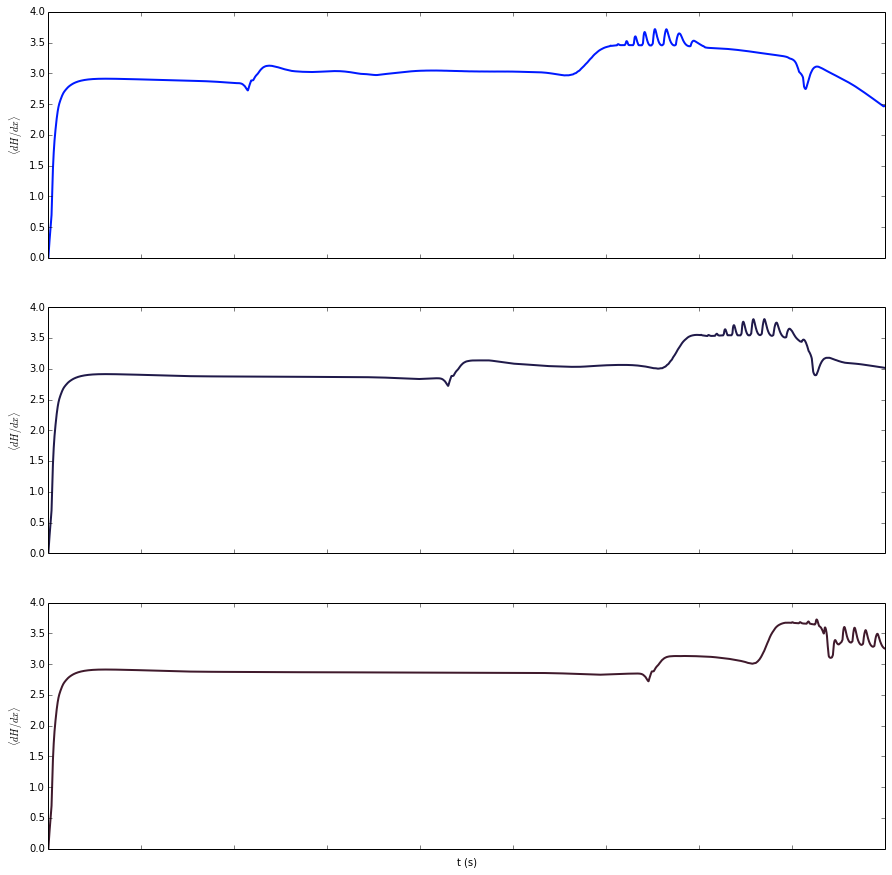

In [5]:
t = linspace(0,T,M+1);
Nh = len(legs)
print "L1/L2 & mean (dH/dx) &  max(dH/dx) &  (V(0)-V(T))/V0\\\n\hline\\"


fig,ax = plt.subplots(nrows = Nh, sharex=True,figsize=(15,15))

mx = max(max(Hbar))
for i in range(len(Hbar)):
    ax[i].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    print "%1.2f    & %.4f    &   %.4f &  %.4f\\\\"%(lr[i], mean(Hbar[i]), max(Hbar[i]), (V0[i]-Vf[i])/V0[i])
    #ax[i].text(4,400,r"$L_1/L_2$=%1.2f"%lr[i])
    #ax[i].set_ylim([0,800])
    #ax[i].set_yticks([0,400,800])
    if i<Nh-1:
         ax[i].set_xticklabels([])
    ax[i].set_ylabel(r'$\langle dH/dx \rangle$')
ax[i].set_xlabel('t (s)')
#savefig("../../dhdxresults.eps", format='eps')
plt.show()
#plot(lr, [max(Hbar[i]) for i in range(len(Hbar))],'o')


In [ ]:
print n0.a


In [ ]:
print n0.Ls

In [ ]:
dx = n0.Ls[0]/n0.Ns[0]

In [ ]:
dt/dx*n0.cmax[2]

In [ ]:
dt/dx*n0.a[0]

In [ ]:
n0.M

In [ ]:
dt/dx*n0.a[0]

In [ ]:

mm = max([mean(Hbar[i]) for i in range(Nh)])

In [ ]:
print mm
print mx

In [14]:
0.25    & 9.5491e-04    &   1.4849e-02 &  0.0016\\
0.50    & 2.8327e-04    &   6.6836e-03 &  0.0014\\
0.75    & 1.2744e-04    &   6.8720e-03 &  0.0013\\
1.00    & 9.7234e-05    &   1.8817e-03 &  0.0012\\
1.25    & 1.0306e-04    &   5.7161e-03 &  0.0011\\
1.50    & 1.3225e-04    &   7.2537e-03 &  0.0010\\
1.75    & 1.2816e-04    &   7.2534e-03 &  0.0009\\
2.00    & 1.2602e-04    &   7.2522e-03 &  0.0009\\


SyntaxError: unexpected character after line continuation character (<ipython-input-14-de6774cae296>, line 1)

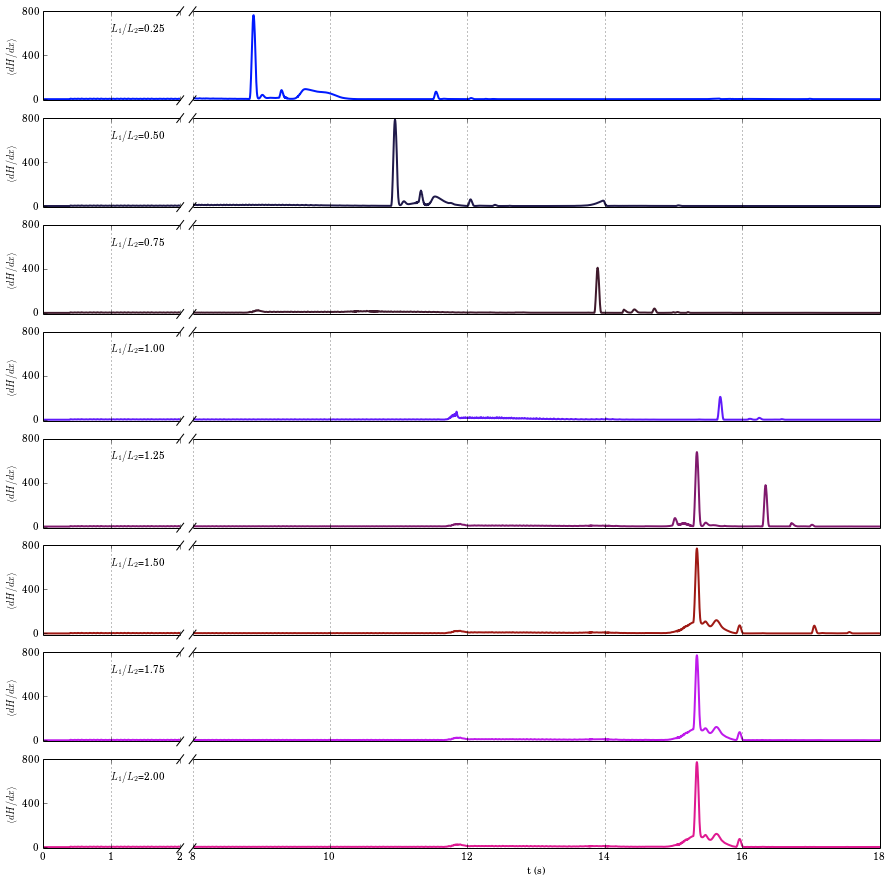

In [121]:
rc('text', usetex=True)
rc('font', family='serif')
import matplotlib.gridspec as gridspec
xlim  = [0., 2.0]
xlab = [0,1,2]
xlim2 = [8, T]
xlab2 = [8,10,12,14,16,18]
ylim = [-10,800]
yticks = [0,400,800]
xticks = [0,2]
xlimratio = (xlim[1]-xlim[0])/(xlim2[1]-xlim2[0]+xlim[1]-xlim[0])
xlim2ratio = (xlim2[1]-xlim2[0])/(ylim2[1]-xlim2[0]+xlim[1]-xlim[0])
gs = gridspec.GridSpec(len(Hbar), 2, width_ratios=[xlimratio, xlim2ratio])
fig = plt.figure(figsize=(15,15))
ax = []

for i in range(len(Hbar)):
    ax.append(fig.add_subplot(gs[2*i]))
    ax.append(fig.add_subplot(gs[2*i+1]))
    ax[2*i].spines['right'].set_visible(False)
    ax[2*i+1].spines['left'].set_visible(False)

    ax[2*i].yaxis.tick_left()
    ax[2*i+1].set_yticks([])
    ax[2*i].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    ax[2*i+1].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)

    ax[2*i+1].set_xlim(xlim2)
    ax[2*i].set_xlim(xlim)
    ax[2*i].set_ylabel(r'$\langle dH/dx \rangle$')  
    ax[2*i].set_xticklabels([])
    ax[2*i+1].set_xticklabels([])
    
    ax[2*i].set_ylim(ylim)
    ax[2*i+1].set_ylim(ylim)
    ax[2*i].set_yticks(yticks)
    ax[2*i].set_yticklabels(yticks)
    ax[2*i].set_xticks(xticks)

    ax[2*i].set_xticks([0,1,2])
    ax[2*i].text(1,600,r"$L_1/L_2$=%1.2f"%lr[i])
    d = .05 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them

    kwargs = dict(transform=ax[2*i].transAxes, color='k', clip_on=False)
    dx = d/(xlim[1]-xlim[0])
    dy = d
    ax[2*i].plot((1-dx,1+dx),(-dy,+dy), **kwargs)    # top-right diagonal

    ax[2*i].plot((1-dx,1+dx),(1-dy,1+dy), **kwargs) # bottom-right diagonal
    dx = d/(xlim2[1]-xlim2[0])
    kwargs.update(transform=ax[2*i+1].transAxes)  # switch to the bottom axes
    ax[2*i+1].plot((-dx,+dx),(-dy,+dy), **kwargs)      # top-left diagonal
    ax[2*i+1].plot((-dx,+dx),(1-dy,1+dy), **kwargs)    # bottom-left diagonal
    plt.subplots_adjust(wspace=0.03)
    ax[2*i+1].xaxis.grid(True)
    ax[2*i].xaxis.grid(True)
ax[2*i].set_xticklabels(xlab)
ax[2*i+1].set_xticklabels(xlab2)
ax[2*i+1].set_xlabel('t (s)')
savefig("../../dhdxresultspretty.eps", format='eps')

In [ ]:
0.25    & 9.5491e-04    &   1.4849e-02 &  0.0016\\
0.50    & 2.8327e-04    &   6.6836e-03 &  0.0014\\
0.75    & 1.2744e-04    &   6.8720e-03 &  0.0013\\
1.00    & 9.7234e-05    &   1.8817e-03 &  0.0012\\
1.25    & 1.0306e-04    &   5.7161e-03 &  0.0011\\
1.50    & 1.3225e-04    &   7.2537e-03 &  0.0010\\
1.75    & 1.2816e-04    &   7.2534e-03 &  0.0009\\
2.00    & 1.2602e-04    &   7.2522e-03 &  0.0009\\
